Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

In [3]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [5]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [7]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [9]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [10]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [11]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

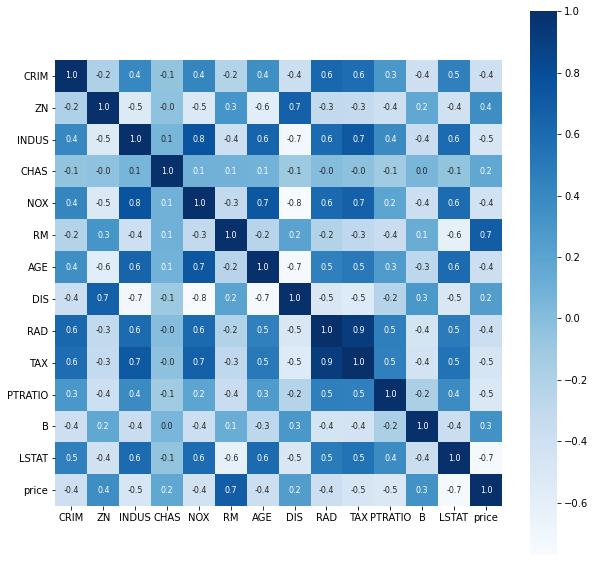

In [12]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [13]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [14]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into Training data and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [17]:
# loading the model
model = XGBRegressor()

In [18]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Evaluation

Prediction on training data

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [21]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999948236320982
Mean Absolute Error :  0.0145848437110976


Visualizing the actual Prices and predicted prices

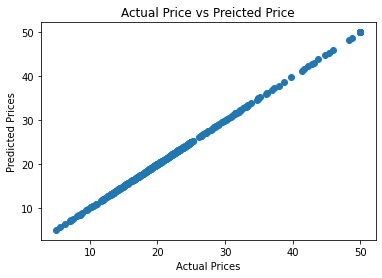

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data 

In [23]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [24]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8711660369151691
Mean Absolute Error :  2.2834744154238233


In [35]:
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


y_train=Y_train
y_test=Y_test

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression


# define models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
bayesian_ridge = BayesianRidge()
xgb = XGBRegressor()
rforest=RandomForestRegressor()
tree=DecisionTreeRegressor()
knn= KNeighborsRegressor()
svr=SVR()


#models = [linear, ridge, lasso, elastic, bayesian_ridge, xgb, rforest, tree, knn, svr]

models=[ridge, lasso, elastic, xgb, rforest, tree, knn, svr]


In [32]:
# ridge-----------------------------------------------------------
solvers=['svd', 'cholesky', 'lsqr', 'sag']
alphas=list(np.logspace(-10, 2, 5,base=10))
#alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
fit_intercepts=[True, False]
normalizes=[True, False]

param_ridge = dict(alpha=alphas,
                  solver=solvers,
                  fit_intercept=fit_intercepts,
                  normalize=normalizes)

# lasso -------------------------------------------------------------
alphas=np.logspace(-5, 2, 10,base=10)
fit_intercepts=[True, False]
# normalizes=[True, False]

param_lasso = dict(alpha=alphas,
                  fit_intercept=fit_intercepts)


# ElasticNet --------------------------------------------------------
l1_ratios=np.arange(0.1,1,0.1)
alphas=np.logspace(-5, 2, 10,base=10)
fit_intercepts=[True, False]
# normalizes=[True, False]

param_eNet = dict(alpha=alphas, l1_ratio=l1_ratios,
                  fit_intercept=fit_intercepts)



# KNN --------------------------------------------------------------
leaf_sizes = list(range(1,50))
n_neighbors = list(range(1,10))
ps=[1,2,3]

param_knn = dict(n_neighbors=n_neighbors, leaf_size=leaf_sizes, p=ps)


# SVM --------------------------------------------------------------
Cs=np.arange(1,100,10)
Cs=[0.001,0.1,10,100,1000, 10000 , 20000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# gammas=['auto', 'scale']
degrees=[1, 2 ,3]

Cs=[20000]
gammas=[0.01, 0.1]
gammas=[0.01]
degrees=[1]



param_svm = dict(C=Cs, kernel=kernels, gamma=gammas, degree=degrees)



# Decison Tree -----------------------------------------------------
splitters=['best','random']
max_depths = np.arange(1,30, 2)
min_samples_splits=np.arange(2,10)

min_samples_leafs=np.arange(1,10)
#min_weight_fraction_leafs=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_features=["auto","log2","sqrt",None]
# max_leaf_nodes=[None,10,20,30,40,50,60,70,80,90]
    
param_tree = dict(splitter=splitters, 
                    max_depth=max_depths,
                    min_samples_leaf=min_samples_leafs,
#                       min_weight_fraction_leaf=min_weight_fraction_leafs,
                    max_features=max_features,
                    min_samples_split=min_samples_splits
#                      max_leaf_nodes=max_leaf_nodes
                        )


# Random forest ----------------------------------------------------
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1200, num = 10)]

max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]+ [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]# Create the random grid
param_rforest  = dict(n_estimators= n_estimators,
          #       max_features= max_features,
                max_depth= max_depth,
        #         min_samples_split= min_samples_split,
         #        min_samples_leaf= min_samples_leaf,
                # bootstrap= bootstrap
                     )
# param = {‘max_depth: [6,9, None], 
#          ‘n_estimators’:[50, 70, 100, 150], 
#           'max_features': randint(1,6),
#           'criterion' : ['gini', 'entropy'],
#           'bootstrap':[True, False],
#           'mln_samples_leaf': randint(1,4)}



# XGBoost ----------------------------------------------------------------
from scipy.stats import loguniform

max_depth= list(range(1, 5))
n_estimators= list(range(100, 500, 100))
learning_rate= list(np.linspace(0.01, 0.1, 5))
subsample= list(np.arange(0.25, 0.75, 0.1))
colsample_bytree= list(np.arange(0.05, 0.5, 0.1))
colsample_bylevel= list(np.arange(0.05, 0.5, 0.1) )
        
param_xgb = dict(
                    max_depth= max_depth,
                    n_estimators= n_estimators,
                    learning_rate= learning_rate
#     subsample=subsample,
#     colsample_bytree=colsample_bytree,
#     colsample_bylevel=colsample_bylevel
                    )

param_grids=[param_ridge, param_lasso, param_eNet,param_xgb, param_rforest, param_tree, param_knn, param_svm ]
models=[ridge, lasso, elastic, xgb, rforest, tree, knn, svr]


# param_grids=[param_svm]
# models=[svr]

In [36]:
# define search
import joblib
met_grid= ['neg_root_mean_squared_error', 'r2']
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

print('Total number of models=', len(models))

for m, model in enumerate(models):
    print(m,model)
    grid_search = GridSearchCV(model, param_grid=param_grids[m], scoring='r2', n_jobs=6, cv=cv)
    grid_search.fit(X_train, y_train)
    
    # summarize result
    print('Best CV Score: %s' % grid_search.best_score_)
    print('Best Test Score: %s' % grid_search.score(X_test, y_test))
    print('Best Hyperparameters: %s' % grid_search.best_params_)
    #joblib.dump(grid_search.best_estimator_, 'filename.pkl')
    
# grid_search.cv_results_['neg_root_mean_squared_error']

Total number of models= 8
0 Ridge()
Best Train Score: 0.6834853964489842
Best Test Score: 0.7788550872645296
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'lsqr'}
1 Lasso()
Best Train Score: 0.6836293488250073
Best Test Score: 0.7798867455394668
Best Hyperparameters: {'alpha': 0.01291549665014884, 'fit_intercept': True}
2 ElasticNet()
Best Train Score: 0.6843355489458212
Best Test Score: 0.7798454078876265
Best Hyperparameters: {'alpha': 0.01291549665014884, 'fit_intercept': True, 'l1_ratio': 0.1}
3 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             rando

In [49]:
# Testing XGBoost
from sklearn.metrics import r2_score 
#xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=400, n_jobs=6, learning_rate=0.0775)

xgb_reg = XGBRegressor()# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred=xgb_reg.predict(X_test)
y_train_pred=xgb_reg.predict(X_train)
cvscore=cross_val_score(xgb_reg, X_train, y_train, scoring = 'r2', cv=10, n_jobs=6).mean()

print("R_squared error-Train : ", r2_score(y_train, y_train_pred)) # Predictions
print("score-CV : ", cvscore) # Predictions
print("R_squared error-Test : ", r2_score(y_test, y_pred)) # Predictions


R_squared error-Train :  0.9999948236320982
score-CV :  0.868352970483183
R_squared error-Test :  0.8757242820183986
